In [1]:
!curl -O http://database.rish.kyoto-u.ac.jp/arch/ncep/data/ncep.reanalysis.derived/surface/slp.mon.mean.nc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 23 20.3M   23 4890k    0     0  7934k      0  0:00:02 --:--:--  0:00:02 8097k
 43 20.3M   43 9150k    0     0  5656k      0  0:00:03  0:00:01  0:00:02 5697k
 65 20.3M   65 13.3M    0     0  5258k      0  0:00:03  0:00:02  0:00:01 5282k
 94 20.3M   94 19.1M    0     0  5450k      0  0:00:03  0:00:03 --:--:-- 5468k
100 20.3M  100 20.3M    0     0  5511k      0  0:00:03  0:00:03 --:--:-- 5528k


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr


ds = xr.open_dataset("slp.mon.mean.nc")

In [3]:
ds

<xarray.Dataset> Size: 39MB
Dimensions:  (lat: 73, lon: 144, time: 929)
Coordinates:
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2025-05-01
Data variables:
    slp      (time, lat, lon) float32 39MB ...
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  These...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 18:12:35 2000: ncrcat -d time,0,622 /Datasets/...
    title:          monthly mean slp from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

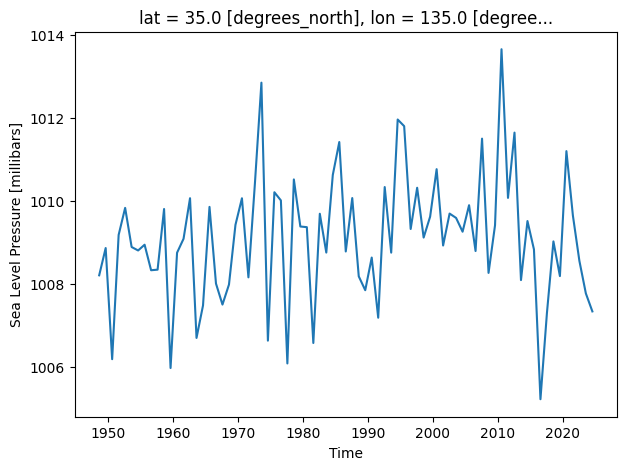

In [4]:
ds.slp.sel(lon=135, lat=35)[7::12].plot(figsize=[7,5])
plt.show()

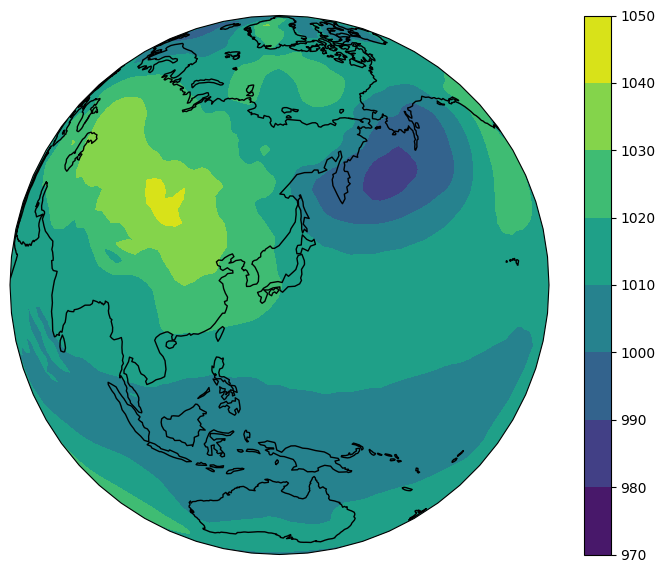

In [5]:
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point


wdata, wlon = add_cyclic_point(ds.slp.sel(time="2020-12")[0], ds.lon)

fig = plt.figure(figsize=[9, 7])
ax = fig.add_subplot(111, projection=ccrs.Orthographic(135,35))

p = ax.contourf(wlon, ds.lat, wdata, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
fig.colorbar(p)
plt.show()

In [7]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': 'volumetric_soil_water_layer_1',
        'year': '2023',
        'month': ['01', '02'],
        'day': ['01'],
        'time': ['00:00'],
        'format': 'netcdf',
    },
    'soil_moisture_2023.nc'
)

2025-06-05 05:43:28,291 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-06-05 05:43:29,215 INFO Request ID is a5162a9c-9e60-494a-97b6-5699b71392d2
2025-06-05 05:43:29,543 INFO status has been updated to accepted
2025-06-05 05:43:35,564 INFO status has been updated to running
2025-06-05 05:43:39,324 INFO status has been updated to successful


6220a9b1c0feb3535fb05f7a2981c924.zip:   0%|          | 0.00/7.29M [00:00<?, ?B/s]

'soil_moisture_2023.nc'

In [9]:
import cdsapi

dataset = "reanalysis-era5-land"
request = {
    "variable": ["volumetric_soil_water_layer_1"],
    "year": "2023",
    "month": "01",
    "day": ["01"],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "netcdf",
    "download_format": "unarchived"
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()


2025-06-05 05:49:20,145 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-06-05 05:49:21,648 INFO Request ID is 1e54d3e9-064f-4e45-95c5-82774fe0a307
2025-06-05 05:49:22,057 INFO status has been updated to accepted
2025-06-05 05:49:32,333 INFO status has been updated to running
2025-06-05 05:50:14,930 INFO status has been updated to successful


ca31a37e94c92c0152389e3f490aea95.nc:   0%|          | 0.00/86.3M [00:00<?, ?B/s]

'ca31a37e94c92c0152389e3f490aea95.nc'

--- データセット情報 ---
<xarray.Dataset> Size: 622MB
Dimensions:     (valid_time: 24, latitude: 1801, longitude: 3600)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 192B 2023-01-01 ... 2023-01-01T23...
  * latitude    (latitude) float64 14kB 90.0 89.9 89.8 ... -89.8 -89.9 -90.0
  * longitude   (longitude) float64 29kB 0.0 0.1 0.2 0.3 ... 359.7 359.8 359.9
    expver      (valid_time) <U4 384B ...
Data variables:
    swvl1       (valid_time, latitude, longitude) float32 622MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-04T20:49 GRIB to CDM+CF via cfgrib-0.9.1...
--------------------


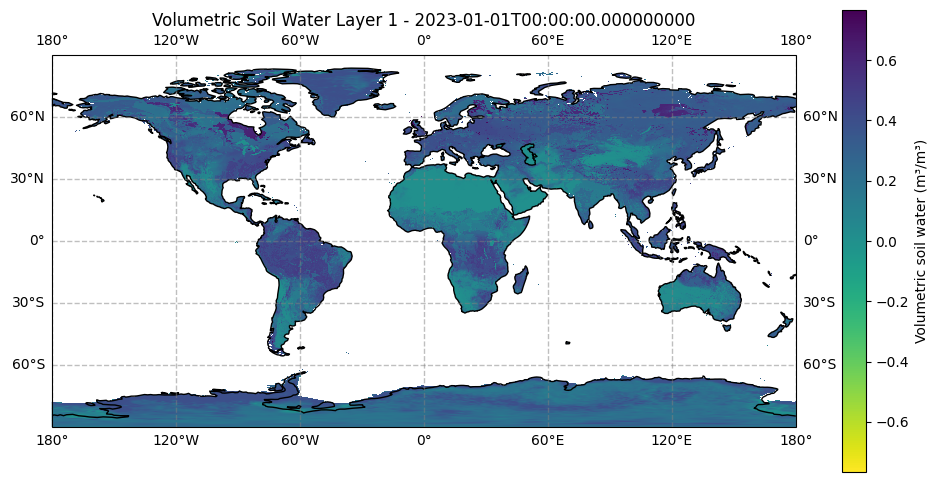

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# --- 設定 ---
# ダウンロードしたNetCDFファイル名
filename = 'ca31a37e94c92c0152389e3f490aea95.nc'
# プロットしたい時刻のインデックス (0は最初の時刻 00:00)
time_index = 0

ds = xr.open_dataset(filename)


# データセットの情報を表示して変数名を確認
print("--- データセット情報 ---")
print(ds)
print("--------------------")


# データ変数を選択 (多くの場合 'swvl1' という名前です)
# ds.data_vars の中から適切な変数名を選んでください
data_variable = ds['swvl1']

# 指定した時刻のデータを抽出
data_slice = data_variable.isel(valid_time=time_index)


# --- 描画処理 ---
# 描画サイズを指定
plt.figure(figsize=(12, 6))

# 地図の投影法を指定 (PlateCarreeは最も基本的な緯度経度図)
ax = plt.axes(projection=ccrs.PlateCarree())

# データを地図上にプロット
# pcolormeshを使うと高速に描画できます
data_slice.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='viridis_r',  # カラースキーム（逆順のviridis）
    cbar_kwargs={'label': 'Volumetric soil water (m³/m³)'} # カラーバーのラベル
)

# 海岸線を描画
ax.coastlines()

# 緯度経度のグリッド線を描画
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

# タイムスタンプからタイトルを生成
time_str = str(data_slice.valid_time.values)
plt.title(f'Volumetric Soil Water Layer 1 - {time_str}')


# プロットを表示
plt.show()

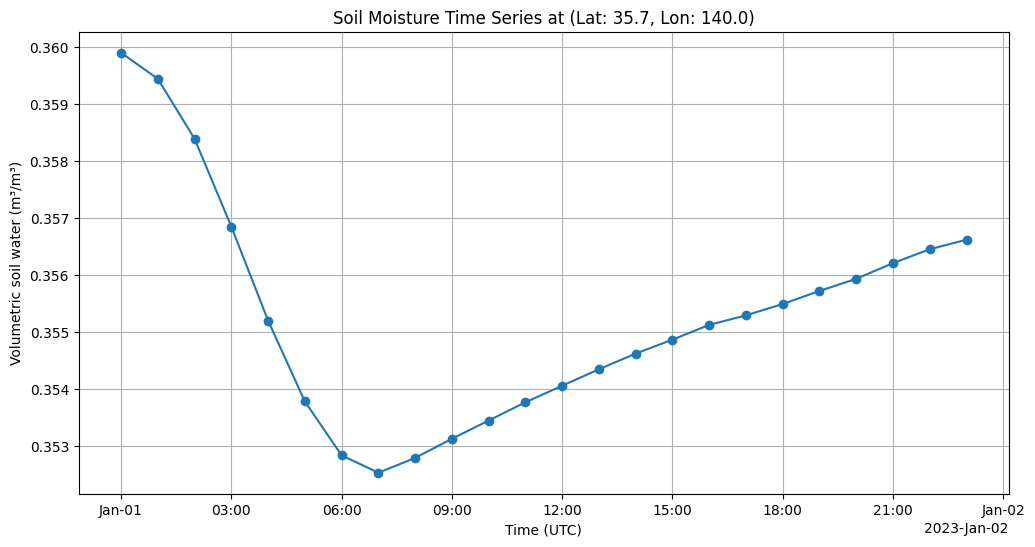

In [16]:
lat_point = 35.7
lon_point = 140.0
# データ変数を選択
data_variable = ds['swvl1']

# 指定した緯度経度に最も近い点のデータを抽出
timeseries = data_variable.sel(latitude=lat_point, longitude=lon_point, method='nearest')

# --- 描画処理 ---
plt.figure(figsize=(12, 6))

timeseries.plot.line(marker='o')

# グラフのタイトルとラベルを設定
plt.title(f'Soil Moisture Time Series at (Lat: {lat_point}, Lon: {lon_point})')
# ★修正点(推奨): 'Time (UTC)' -> 'Valid Time (UTC)'
plt.xlabel('Time (UTC)')
plt.ylabel('Volumetric soil water (m³/m³)')
plt.grid(True)

plt.show()

In [41]:
import cdsapi

dataset = "reanalysis-era5-land"
download_file = "20250525_soil_moisture.nc"
request = {
    "variable": ["volumetric_soil_water_layer_1"],
    "year": "2025",
    "month": "05",
    "day": ["25"],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "netcdf",
    "download_format": "unarchived"
}

client = cdsapi.Client()
client.retrieve(dataset, request).download(download_file)


2025-06-05 07:39:57,767 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-06-05 07:39:58,483 INFO Request ID is 9e75a49e-dd8d-462d-90b7-fd907e509094
2025-06-05 07:39:59,062 INFO status has been updated to accepted
2025-06-05 07:40:13,949 INFO status has been updated to running
2025-06-05 07:40:21,936 INFO status has been updated to accepted
2025-06-05 07:40:33,713 INFO status has been updated to running
2025-06-05 07:40:51,181 INFO status has been updated to successful


6a22e3b08ad68b64a76dc62968bd6d11.nc:   0%|          | 0.00/87.0M [00:00<?, ?B/s]

'20250525_soil_moisture.nc'

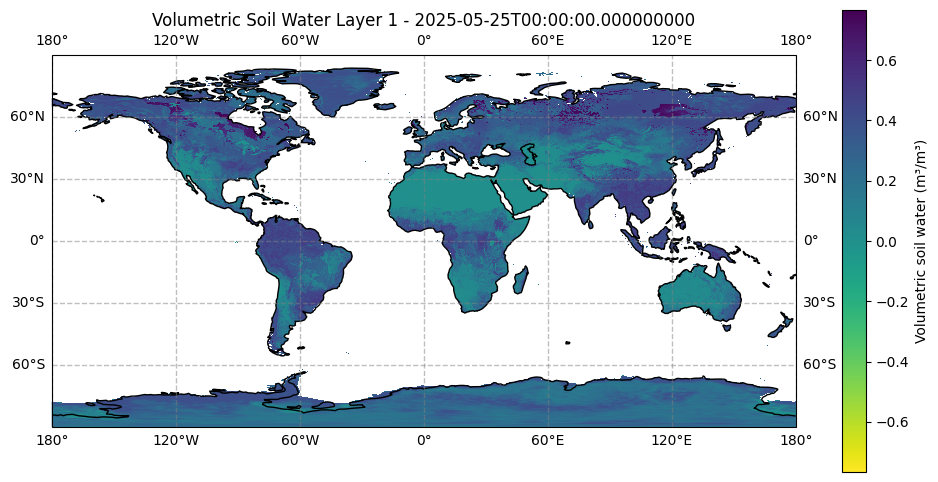

In [42]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# --- 設定 ---
# ダウンロードしたNetCDFファイル名
filename = '20250525_soil_moisture.nc'
# プロットしたい時刻のインデックス (0は最初の時刻 00:00)
time_index = 0

ds = xr.open_dataset(filename)




# データ変数を選択 (多くの場合 'swvl1' という名前です)
# ds.data_vars の中から適切な変数名を選んでください
data_variable = ds['swvl1']

# 指定した時刻のデータを抽出
data_slice = data_variable.isel(valid_time=time_index)


# --- 描画処理 ---
# 描画サイズを指定
plt.figure(figsize=(12, 6))

# 地図の投影法を指定 (PlateCarreeは最も基本的な緯度経度図)
ax = plt.axes(projection=ccrs.PlateCarree())

# データを地図上にプロット
# pcolormeshを使うと高速に描画できます
data_slice.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='viridis_r',  # カラースキーム（逆順のviridis）
    cbar_kwargs={'label': 'Volumetric soil water (m³/m³)'} # カラーバーのラベル
)

# 海岸線を描画
ax.coastlines()

# 緯度経度のグリッド線を描画
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

# タイムスタンプからタイトルを生成
time_str = str(data_slice.valid_time.values)
plt.title(f'Volumetric Soil Water Layer 1 - {time_str}')


# プロットを表示
plt.show()

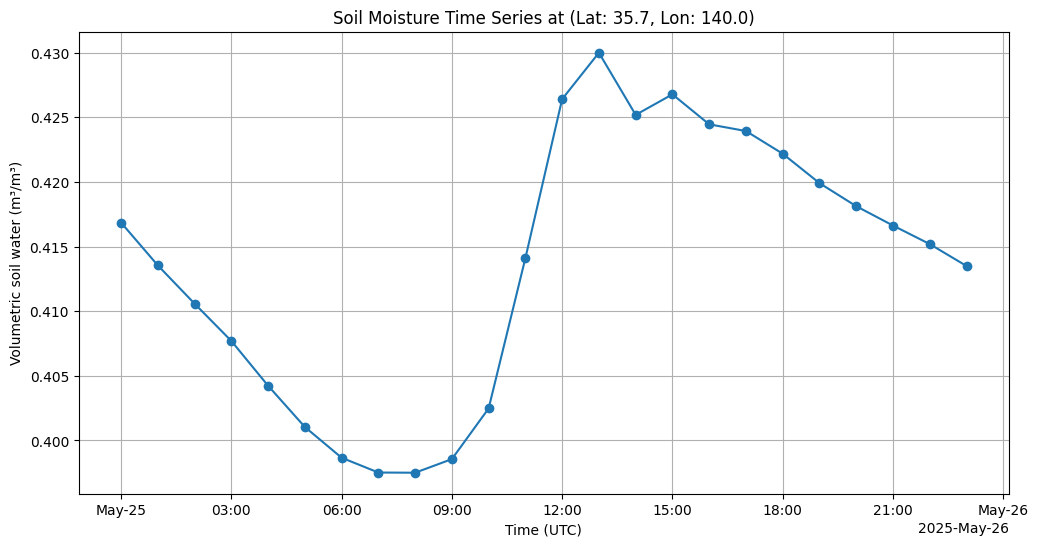

In [43]:
lat_point = 35.7
lon_point = 140.0
# データ変数を選択
data_variable = ds['swvl1']

# 指定した緯度経度に最も近い点のデータを抽出
timeseries = data_variable.sel(latitude=lat_point, longitude=lon_point, method='nearest')

# --- 描画処理 ---
plt.figure(figsize=(12, 6))

timeseries.plot.line(marker='o')

# グラフのタイトルとラベルを設定
plt.title(f'Soil Moisture Time Series at (Lat: {lat_point}, Lon: {lon_point})')
# ★修正点(推奨): 'Time (UTC)' -> 'Valid Time (UTC)'
plt.xlabel('Time (UTC)')
plt.ylabel('Volumetric soil water (m³/m³)')
plt.grid(True)

plt.show()

In [17]:
import cdsapi

client = cdsapi.Client()

# ダウンロードするファイル名
download_file = "solar_radiation_japan_202405.nc"

client.retrieve(
    'reanalysis-era5-single-levels', # ★データセット名が異なります
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': 'surface_solar_radiation_downwards',
        # 'variable': [ # 複数選択も可能
        #     'surface_solar_radiation_downwards',
        #     'total_sky_direct_solar_radiation_at_surface', # 直達日射量
        # ],
        'year': '2024',
        'month': '05',
        'day': '01',
        'time': [
            '00:00', '01:00', '02:00', '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00', '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00', '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00', '21:00', '22:00', '23:00',
        ],
        # 日本周辺の領域を指定 [North, West, South, East]
        'area': [
            46, 128, 30, 148,
        ],
    },
    download_file)

print(f"データが {download_file} にダウンロードされました。")

2025-06-05 06:28:18,000 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-06-05 06:28:19,102 INFO Request ID is 6ed1da8e-f5cb-409f-a394-c8110d017888
2025-06-05 06:28:19,434 INFO status has been updated to accepted
2025-06-05 06:28:34,359 INFO status has been updated to running
2025-06-05 06:28:42,576 INFO status has been updated to successful


e3dc6f4af8b3851c5e7312ee96df8674.nc:   0%|          | 0.00/162k [00:00<?, ?B/s]

データが solar_radiation_japan_202405.nc にダウンロードされました。


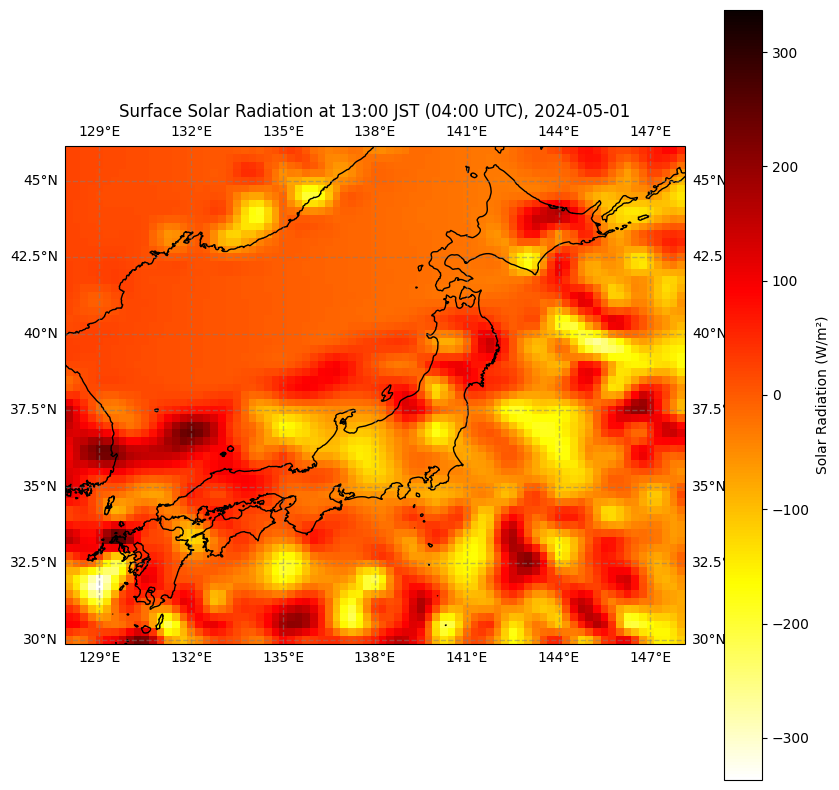

In [19]:
filename = 'solar_radiation_japan_202405.nc'

# NetCDFファイルを開く
ds = xr.open_dataset(filename)

# 変数名は 'ssrd' という短い名前になっていることが多い
# print(ds) で確認してください
data_variable = ds['ssrd']

# 日本時間の13時(04:00 UTC)のデータを計算
# 04:00の値(00-04時の積算)から03:00の値(00-03時の積算)を引く
rad_04_utc_J = data_variable.sel(valid_time='2024-05-01T04:00') - data_variable.sel(valid_time='2024-05-01T03:00')

# 単位を J/m² から W/m² (1時間平均) に変換 (1時間 = 3600秒)
rad_04_utc_W_m2 = rad_04_utc_J / 3600

# --- 描画処理 ---
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# W/m^2 に変換したデータをプロット
rad_04_utc_W_m2.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='hot_r', # 日射量に適したカラースキーム
    cbar_kwargs={'label': 'Solar Radiation (W/m²)'}
)

ax.coastlines(resolution='10m') # 高解像度の海岸線
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

plt.title('Surface Solar Radiation at 13:00 JST (04:00 UTC), 2024-05-01')
plt.show()

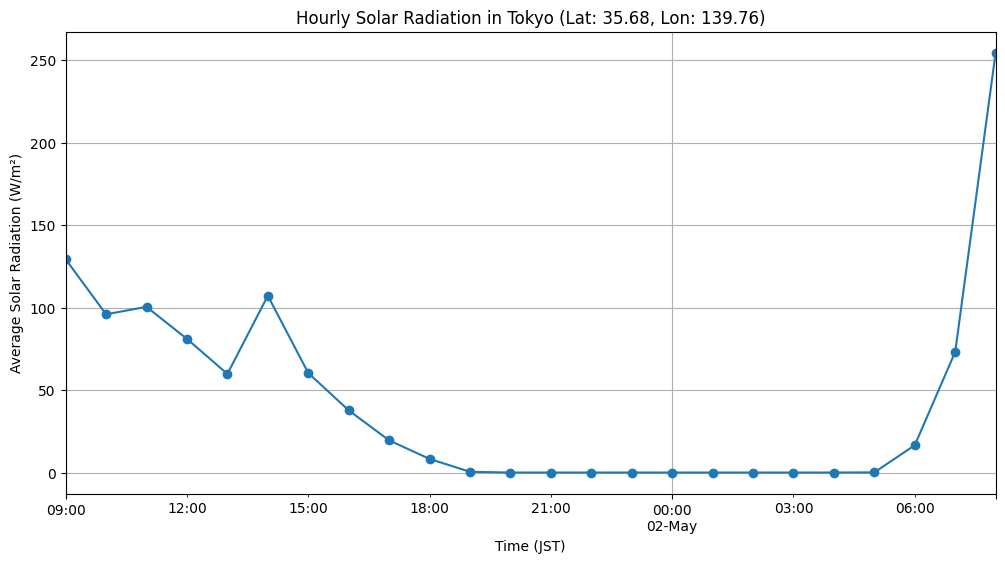

In [20]:
import pandas as pd

# --- 設定 ---
filename = 'solar_radiation_japan_202405.nc'
lat_point = 35.68  # 東京
lon_point = 139.76

# NetCDFファイルを開く
ds = xr.open_dataset(filename)
data_variable = ds['ssrd']

# 東京に最も近い点のデータを抽出
timeseries_J = data_variable.sel(latitude=lat_point, longitude=lon_point, method='nearest')

# 【重要】積算値から1時間ごとの値に変換
hourly_J = timeseries_J.diff('time')

# 単位を J/m² から W/m² (1時間平均) に変換
hourly_W_m2 = hourly_J / 3600

# 描画のために pandas Series に変換
# xarrayの .diff() を使うと最初の時刻(00:00)が消えるので注意
s = hourly_W_m2.to_series()

# タイムゾーンをUTCからJSTに変換してX軸ラベルを分かりやすくする
s.index = s.index.tz_localize('UTC').tz_convert('Asia/Tokyo')


# --- 描画処理 ---
plt.figure(figsize=(12, 6))
s.plot(kind='line', marker='o')

plt.title(f'Hourly Solar Radiation in Tokyo (Lat: {lat_point}, Lon: {lon_point})')
plt.xlabel('Time (JST)')
plt.ylabel('Average Solar Radiation (W/m²)')
plt.grid(True)
plt.show()

In [28]:
import cdsapi

client = cdsapi.Client()

download_file = "2025wind_data_japan.nc"

client.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': [
            '10m_u_component_of_wind', '10m_v_component_of_wind',
        ],
        'year': '2025',
        'month': '05',
        'day': '20',
        # 日本時間の正午12時は03:00 UTC
        'time': '03:00',
        # 日本周辺の領域を指定 [North, West, South, East]
        'area': [
            46, 128, 30, 148,
        ],
    },
    download_file)

print(f"データが {download_file} にダウンロードされました。")

2025-06-05 06:46:06,143 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-06-05 06:46:07,257 INFO Request ID is b39a3a91-5abb-463e-893c-8de64a6e668c
2025-06-05 06:46:07,667 INFO status has been updated to accepted
2025-06-05 06:47:00,097 INFO status has been updated to successful


a9bb1215b330eeea45b7a1d613fa385e.nc:   0%|          | 0.00/58.1k [00:00<?, ?B/s]

データが 2025wind_data_japan.nc にダウンロードされました。


<xarray.Dataset> Size: 43kB
Dimensions:     (valid_time: 1, latitude: 65, longitude: 81)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8B 2025-05-20T03:00:00
  * latitude    (latitude) float64 520B 46.0 45.75 45.5 ... 30.5 30.25 30.0
  * longitude   (longitude) float64 648B 128.0 128.2 128.5 ... 147.5 147.8 148.0
    expver      <U4 16B ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 21kB ...
    v10         (valid_time, latitude, longitude) float32 21kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-04T21:45 GRIB to CDM+CF via cfgrib-0.9.1...


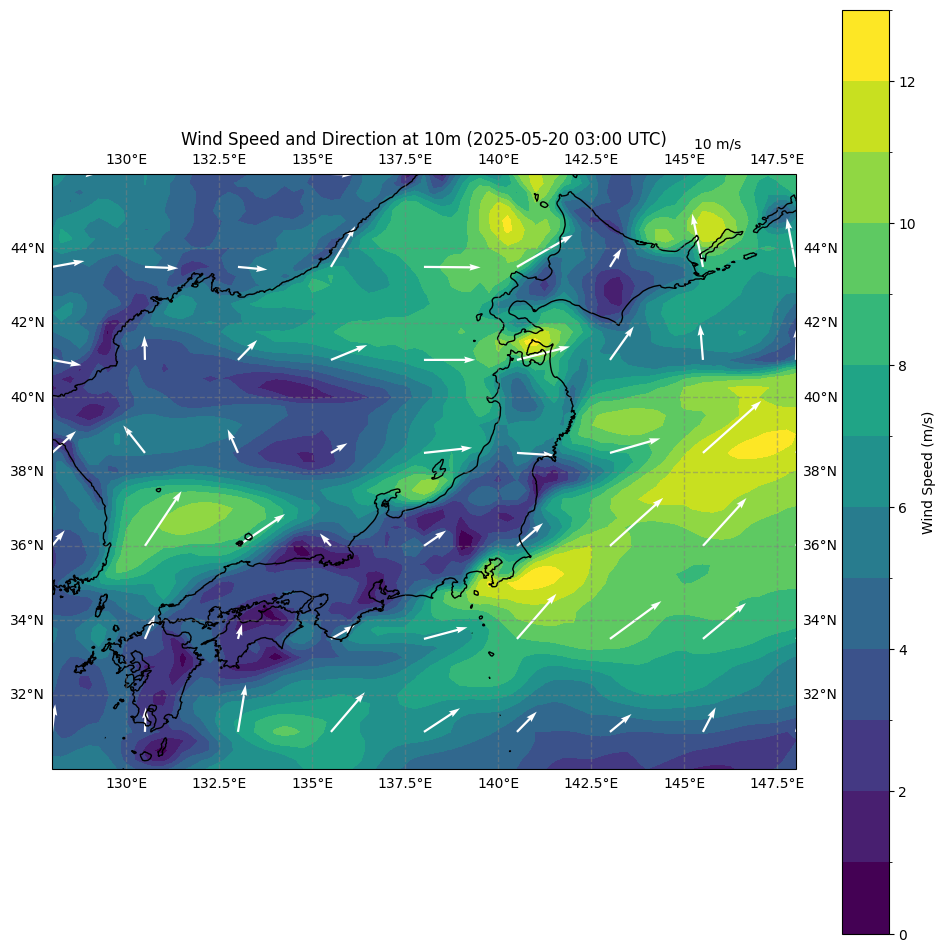

In [29]:
filename = '2025wind_data_japan.nc'

# NetCDFファイルを開く
ds = xr.open_dataset(filename)
# データセットの情報を確認して変数名を見る (u10, v10など)
print(ds)

# データ変数を選択 (多くの場合、短い名前 'u10', 'v10' になっています)
u_wind = ds['u10'].squeeze() # squeeze()で不要な次元を削除
v_wind = ds['v10'].squeeze()

# 風速を計算 (ピタゴラスの定理)
wind_speed = np.sqrt(u_wind**2 + v_wind**2)

# --- 描画処理 ---
plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

# 1. 風速を色付きのコンター図でプロット
wind_speed.plot.contourf(
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=15, # 色分けの段階数
    cmap='viridis', # カラースキーム
    cbar_kwargs={'label': 'Wind Speed (m/s)'}
)

# 2. 風向を矢羽(quiver)でプロット
# 全ての点に矢印を描くと真っ黒になるため、データを間引く (ここでは10点ごと)
thin = 10
quiver = ax.quiver(
    u_wind.longitude.values[::thin],
    u_wind.latitude.values[::thin],
    u_wind.values[::thin, ::thin],
    v_wind.values[::thin, ::thin],
    transform=ccrs.PlateCarree(),
    color='white',
    width=0.003
)

# 矢印のスケール（凡例）を追加
ax.quiverkey(quiver, X=0.85, Y=1.05, U=10,
             label='10 m/s', labelpos='E')


# 地図の装飾
ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

time_str = pd.to_datetime(ds.valid_time.values[0]).strftime('%Y-%m-%d %H:%M UTC')
plt.title(f'Wind Speed and Direction at 10m ({time_str})')
plt.show()


In [36]:
import cdsapi

client = cdsapi.Client()

download_file = "soil_moisture_japan_20250525.nc"

client.retrieve(
    'reanalysis-era5-land',
    {
        'variable': 'volumetric_soil_water_layer_1',
        'year': '2025',
        'month': '05',
        'day': '25',
        'time': '00:00/to/23:00/by/1', # 時間の指定をより簡潔に
        'area': [46, 128, 30, 148],
        'format': 'netcdf',
        # ★★★ ベストプラクティスとして常に追加 ★★★
        'download_format': 'unarchived',
    },
    download_file)

print(f"データが {download_file} にダウンロードされました。")

2025-06-05 07:05:27,351 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-06-05 07:05:28,473 INFO Request ID is e41cfc5a-e9cb-4ad6-b185-d1b247b733f9
2025-06-05 07:05:28,806 INFO status has been updated to accepted
2025-06-05 07:06:21,031 INFO status has been updated to running
2025-06-05 07:06:47,016 INFO status has been updated to successful


9af4b36b1cfdd0dc31cbd6866eea5345.nc:   0%|          | 0.00/405k [00:00<?, ?B/s]

データが soil_moisture_japan_20250525.nc にダウンロードされました。


<xarray.Dataset> Size: 3MB
Dimensions:     (valid_time: 24, latitude: 161, longitude: 201)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 192B 2025-05-25 ... 2025-05-25T23...
  * latitude    (latitude) float64 1kB 46.0 45.9 45.8 45.7 ... 30.2 30.1 30.0
  * longitude   (longitude) float64 2kB 128.0 128.1 128.2 ... 147.8 147.9 148.0
    expver      (valid_time) <U4 384B ...
Data variables:
    swvl1       (valid_time, latitude, longitude) float32 3MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-04T22:06 GRIB to CDM+CF via cfgrib-0.9.1...


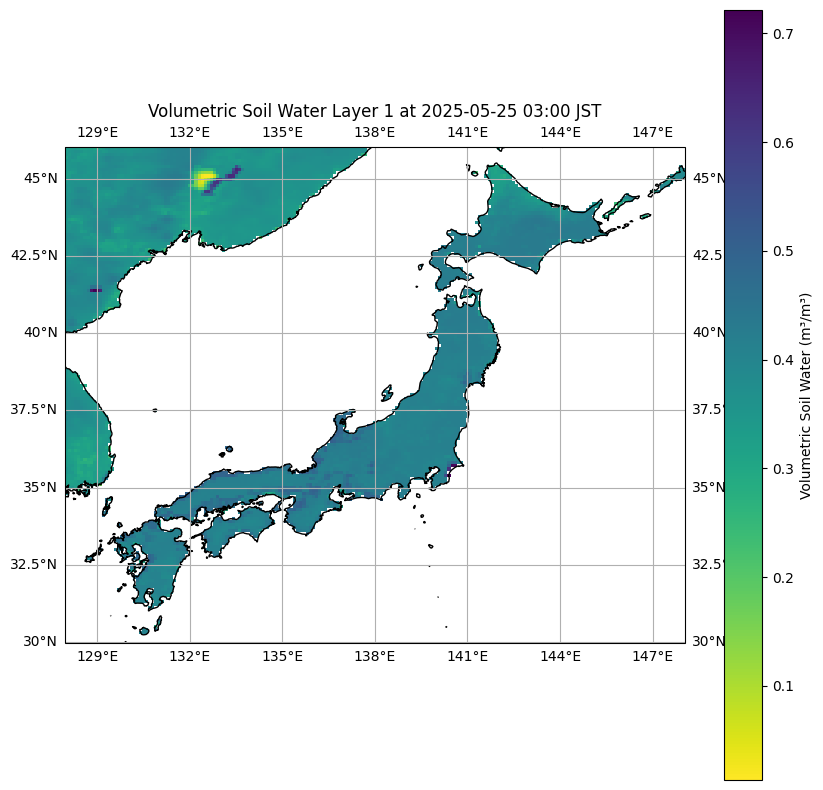

In [37]:
filename = 'soil_moisture_japan_20250525.nc'

# NetCDFファイルを開く
ds = xr.open_dataset(filename)
# 変数名(swvl1)と座標名(valid_time)を確認
print(ds)

# データ変数と時刻を選択
# 日本時間の正午12時は 03:00 UTC
data_slice = ds['swvl1'].sel(valid_time='2025-05-25T03:00:00')


# --- 描画処理 ---
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# 土壌水分量をプロット
data_slice.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='viridis_r',  # 水分量に適したカラースキーム（緑→黄）
    cbar_kwargs={'label': 'Volumetric Soil Water (m³/m³)'}
)

# 地図の装飾
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)

time_str = pd.to_datetime(data_slice.valid_time.values).strftime('%Y-%m-%d %H:%M JST')
plt.title(f'Volumetric Soil Water Layer 1 at {time_str}')
plt.show()

In [39]:
client = cdsapi.Client()

download_file = "soil_moisture_japan_20250506.nc"

client.retrieve(
    'reanalysis-era5-land',
    {
        'variable': 'volumetric_soil_water_layer_1',
        'year': '2025',
        'month': '05',
        'day': '06',
        'time': '00:00/to/23:00/by/1', # 時間の指定をより簡潔に
        'area': [46, 128, 30, 148],
        'format': 'netcdf',
        # ★★★ ベストプラクティスとして常に追加 ★★★
        'download_format': 'unarchived',
    },
    download_file)

print(f"データが {download_file} にダウンロードされました。")

2025-06-05 07:11:50,017 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-06-05 07:11:50,743 INFO Request ID is 5f793098-841e-40e7-87ab-452f60f6a9f6
2025-06-05 07:11:51,247 INFO status has been updated to accepted
2025-06-05 07:12:14,083 INFO status has been updated to successful


7b98a219248f3b4bcd8932e808616afe.nc:   0%|          | 0.00/401k [00:00<?, ?B/s]

データが soil_moisture_japan_20250506.nc にダウンロードされました。


<xarray.Dataset> Size: 3MB
Dimensions:     (valid_time: 24, latitude: 161, longitude: 201)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 192B 2025-05-06 ... 2025-05-06T23...
  * latitude    (latitude) float64 1kB 46.0 45.9 45.8 45.7 ... 30.2 30.1 30.0
  * longitude   (longitude) float64 2kB 128.0 128.1 128.2 ... 147.8 147.9 148.0
    expver      (valid_time) <U4 384B ...
Data variables:
    swvl1       (valid_time, latitude, longitude) float32 3MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-04T22:12 GRIB to CDM+CF via cfgrib-0.9.1...


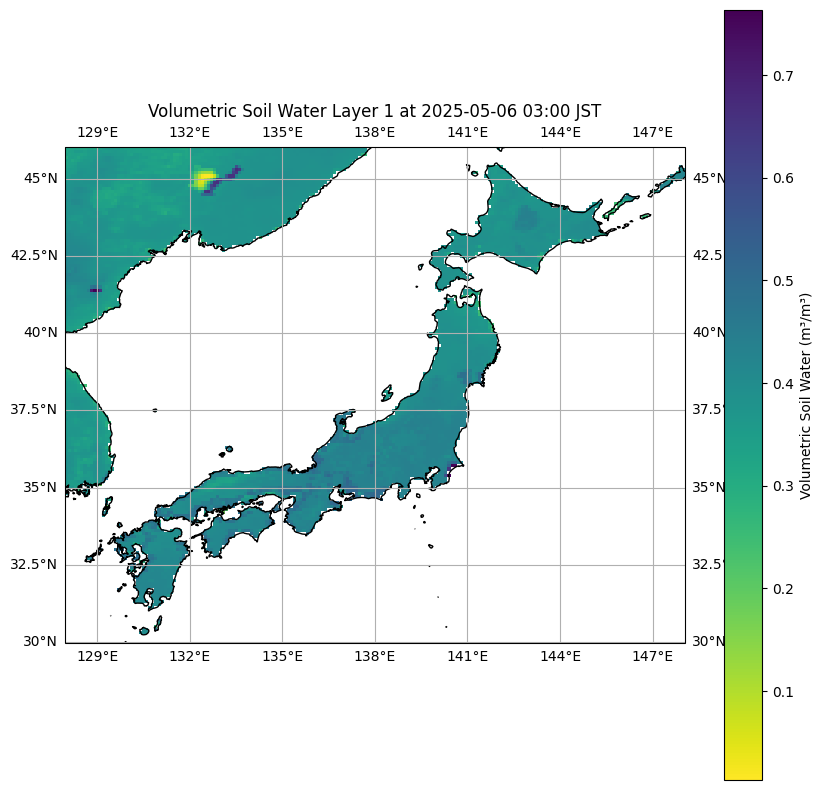

In [40]:
filename = 'soil_moisture_japan_20250506.nc'

# NetCDFファイルを開く
ds = xr.open_dataset(filename)
# 変数名(swvl1)と座標名(valid_time)を確認
print(ds)

# データ変数と時刻を選択
# 日本時間の正午12時は 03:00 UTC
data_slice = ds['swvl1'].sel(valid_time='2025-05-06T03:00:00')


# --- 描画処理 ---
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# 土壌水分量をプロット
data_slice.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='viridis_r',  # 水分量に適したカラースキーム（緑→黄）
    cbar_kwargs={'label': 'Volumetric Soil Water (m³/m³)'}
)

# 地図の装飾
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)

time_str = pd.to_datetime(data_slice.valid_time.values).strftime('%Y-%m-%d %H:%M JST')
plt.title(f'Volumetric Soil Water Layer 1 at {time_str}')
plt.show()